## Chapter11: Sorting Arrays

---
* Author:  [Yuttapong Mahasittiwat](mailto:khala1391@gmail.com)
* Technologist | Data Modeler | Data Analyst
* [YouTube](https://www.youtube.com/khala1391)
* [LinkedIn](https://www.linkedin.com/in/yuttapong-m/)
---

Source: [**Python Data Science Handbook** by **VanderPlas**](https://jakevdp.github.io/PythonDataScienceHandbook/)

In [356]:
import numpy as np
import pandas as pd
print("numpy version :",np.__version__)
print("pandas version :",pd.__version__)

numpy version : 1.26.4
pandas version : 2.2.1


In [358]:
L = [3,1,4,1,5,9,2,6]
sorted(L)  # sorted copy

[1, 1, 2, 3, 4, 5, 6, 9]

In [360]:
L.sort()  # acts in-place, return None
L

[1, 1, 2, 3, 4, 5, 6, 9]

In [361]:
sorted('Python')

['P', 'h', 'n', 'o', 't', 'y']

## Fast Sorting: np.sort, np.argsort

In [365]:
x = np.array([2,1,4,3,5])
np.sort(x)  # sorted copy

array([1, 2, 3, 4, 5])

In [366]:
# python built-in function
x.sort()
x

array([1, 2, 3, 4, 5])

In [367]:
# argsort return indices
x = np.array([2,1,4,3,5])
i = np.argsort(x)
i

array([1, 0, 3, 2, 4], dtype=int64)

In [370]:
x[i]  # fancy indexing

array([1, 2, 3, 4, 5])

## sorting along rows or columns

In [373]:
rng = np.random.default_rng(seed=42)
X = rng.integers(0,10,(4,6))
X

array([[0, 7, 6, 4, 4, 8],
       [0, 6, 2, 0, 5, 9],
       [7, 7, 7, 7, 5, 1],
       [8, 4, 5, 3, 1, 9]], dtype=int64)

In [375]:
# sort each column
np.sort(X, axis=0)

array([[0, 4, 2, 0, 1, 1],
       [0, 6, 5, 3, 4, 8],
       [7, 7, 6, 4, 5, 9],
       [8, 7, 7, 7, 5, 9]], dtype=int64)

In [376]:
# sort each row
np.sort(X, axis=1)

array([[0, 4, 4, 6, 7, 8],
       [0, 0, 2, 5, 6, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]], dtype=int64)

## partial sorts: partitioning

In [380]:
x = np.array([7,2,3,1,6,5,4])
np.partition(x,3)

array([2, 1, 3, 4, 6, 5, 7])

In [381]:
np.partition(X,2,axis=1)  # partition by column

array([[0, 4, 4, 7, 6, 8],
       [0, 0, 2, 6, 5, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]], dtype=int64)

In [382]:
np.partition(X,2,axis=0)  # partition by row

array([[0, 4, 2, 0, 1, 1],
       [0, 6, 5, 3, 4, 8],
       [7, 7, 6, 4, 5, 9],
       [8, 7, 7, 7, 5, 9]], dtype=int64)

## example: k-nearest neighbors

In [385]:
X = rng.random((10,2))

In [386]:
import matplotlib as mpl
import matplotlib.pyplot as plt
print("matplotlib version:",mpl.__version__)

matplotlib version: 3.8.4


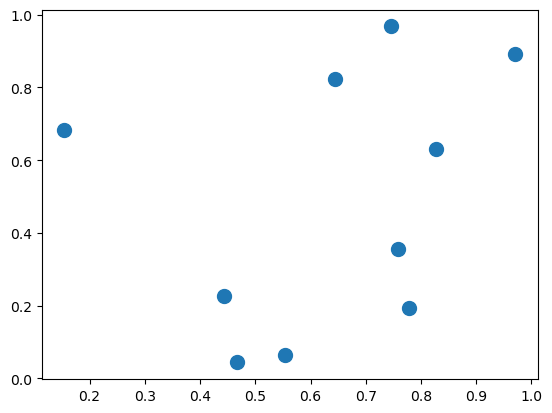

In [387]:
plt.scatter(X[:,0],X[:,1],s=100);

In [391]:
dist_sq = np.sum((X[:,np.newaxis]-X[np.newaxis,:])**2, axis=-1) # 2D array
# apply broadcasting, aggregation concept
dist_sq.shape

(10, 10)

**BreakDown**

In [393]:
from PIL import Image
from IPython.display import display

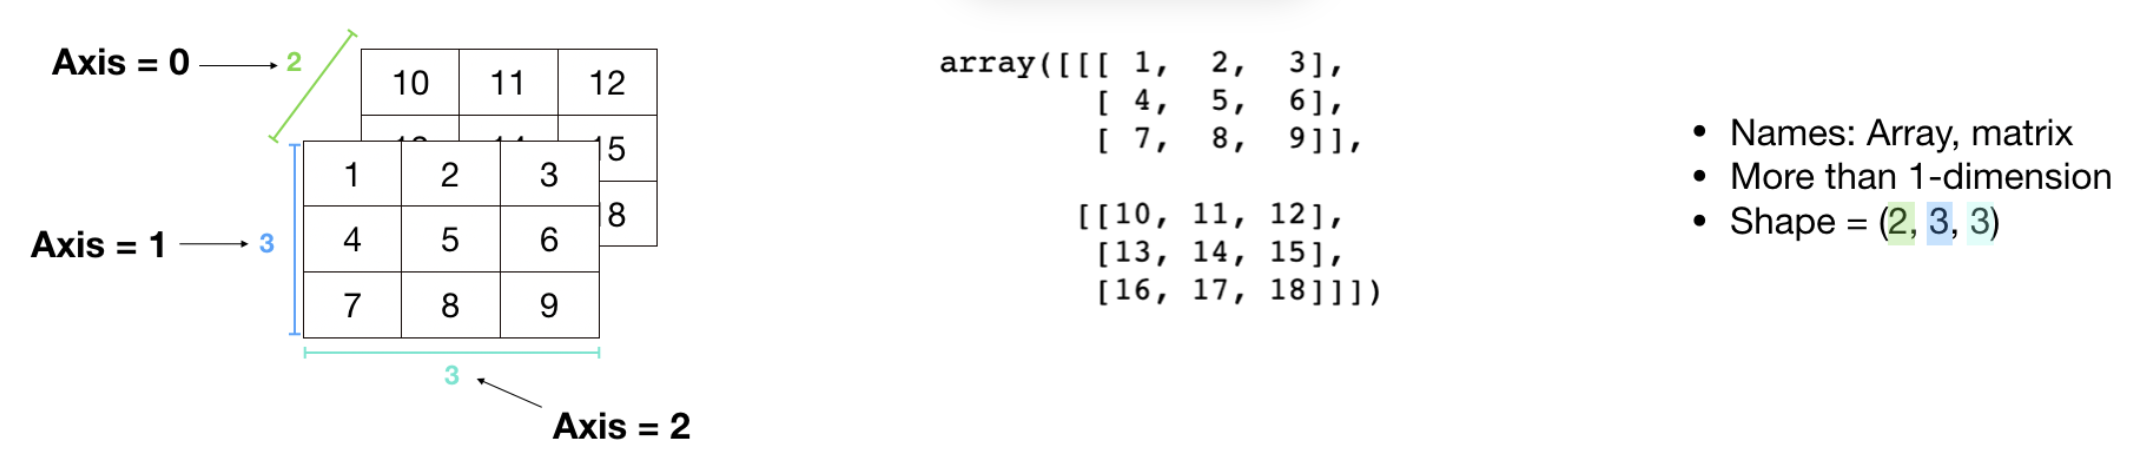

In [396]:
img = Image.open('figure/3D_array.png')
w,h = img.size
s = 1
img = img.resize((int(s*w),int(s*h)))
display(img)

In [397]:
# compute difference for all pairs
differences = X[:,np.newaxis]-X[np.newaxis,:]
differences.shape

(10, 10, 2)

In [398]:
X, X.shape

(array([[0.64386512, 0.82276161],
        [0.4434142 , 0.22723872],
        [0.55458479, 0.06381726],
        [0.82763117, 0.6316644 ],
        [0.75808774, 0.35452597],
        [0.97069802, 0.89312112],
        [0.7783835 , 0.19463871],
        [0.466721  , 0.04380377],
        [0.15428949, 0.68304895],
        [0.74476216, 0.96750973]]),
 (10, 2))

In [399]:
X[np.newaxis,:], X[np.newaxis,:].shape

(array([[[0.64386512, 0.82276161],
         [0.4434142 , 0.22723872],
         [0.55458479, 0.06381726],
         [0.82763117, 0.6316644 ],
         [0.75808774, 0.35452597],
         [0.97069802, 0.89312112],
         [0.7783835 , 0.19463871],
         [0.466721  , 0.04380377],
         [0.15428949, 0.68304895],
         [0.74476216, 0.96750973]]]),
 (1, 10, 2))

In [400]:
X[np.newaxis,:], X[np.newaxis,:].shape

(array([[[0.64386512, 0.82276161],
         [0.4434142 , 0.22723872],
         [0.55458479, 0.06381726],
         [0.82763117, 0.6316644 ],
         [0.75808774, 0.35452597],
         [0.97069802, 0.89312112],
         [0.7783835 , 0.19463871],
         [0.466721  , 0.04380377],
         [0.15428949, 0.68304895],
         [0.74476216, 0.96750973]]]),
 (1, 10, 2))

In [401]:
X.shape, X[:,np.newaxis].shape, X[np.newaxis,:].shape

((10, 2), (10, 1, 2), (1, 10, 2))

In [402]:
# square coordinate differences
sq_differences = differences **2
sq_differences.shape

(10, 10, 2)

In [404]:
# sum coordinate difference to get squared distance
dist_sq_proof = sq_differences.sum(-1)
dist_sq_proof.shape

(10, 10)

In [406]:
dist_sq_proof.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [408]:
# The axis keyword specifies the dimension of the array that will be collapsed
# dist_sq_proof[9,:]
nearest = np.argsort(dist_sq_proof, axis=1)  # sort along row and collapse to column
nearest

array([[0, 9, 3, 5, 4, 8, 1, 6, 2, 7],
       [1, 7, 2, 6, 4, 8, 3, 0, 9, 5],
       [2, 7, 1, 6, 4, 3, 8, 0, 9, 5],
       [3, 0, 4, 5, 9, 6, 1, 2, 8, 7],
       [4, 6, 3, 1, 2, 7, 0, 5, 9, 8],
       [5, 9, 3, 0, 4, 6, 8, 1, 2, 7],
       [6, 4, 2, 1, 7, 3, 0, 5, 9, 8],
       [7, 2, 1, 6, 4, 3, 8, 0, 9, 5],
       [8, 0, 1, 9, 3, 4, 7, 2, 6, 5],
       [9, 0, 5, 3, 4, 8, 6, 1, 2, 7]], dtype=int64)

In [409]:
K = 2
nearest_partition = np.argpartition(dist_sq_proof, K+1, axis=1) # cut since K=3

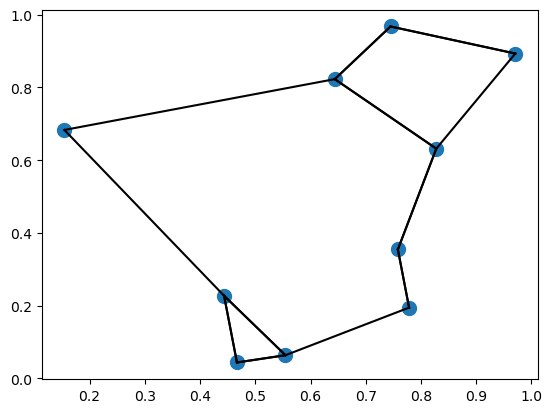

In [410]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point
K= 2
for i in range(X.shape[0]):
    for j in nearest_partition[i,:K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic
        plt.plot(*zip(X[j],X[i]), color='black')
        

## np.newaxis

In [413]:
np.newaxis is None

True

In [414]:
x = np.arange(3)
x

array([0, 1, 2])

In [415]:
x.shape

(3,)

In [423]:
x[:, np.newaxis]

array([[0],
       [1],
       [2]])

In [426]:
x[:, np.newaxis].shape

(3, 1)

In [429]:
x[:, np.newaxis, np.newaxis]

array([[[0]],

       [[1]],

       [[2]]])

In [430]:
x[:, np.newaxis, np.newaxis].shape

(3, 1, 1)